In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from conv2d import Conv2D

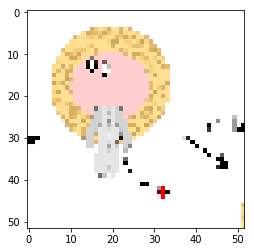

In [2]:
image = mpimg.imread('fig.png')
# make image smaller (faster execution) and change format from [0,1] to [0,255]
image = (image[::10,::10])
plt.imshow(image)
plt.show()

In [4]:
flags = image.copy()
flags = flags.sum(axis=2)
flags[flags!=3]=0
flags[flags==3]=1
flags = flags.reshape((*flags.shape,1))

In [74]:
# initialize system
n=12
conv = Conv2D(n,image.shape[2])
conv.initialize_weights()

conv2 = Conv2D(1,n)
conv2.initialize_weights()
conv.next_layer = conv2

In [124]:
copy1 = conv.kernels.copy()
copyb1 = conv.bias.copy()
copy2 = conv2.kernels.copy()
copyb2 = conv2.bias.copy()
for i in range(5):
    # run one iteration
    temp = conv.feed_forward(image)
    #temp = conv2.feed_forward(temp)

    conv2.back_propagate(y=flags[2:-2,2:-2],learning_rate=0.00001)
    conv.back_propagate(learning_rate=0.00001)
    
    error = temp-flags[2:-2,2:-2]
    print((error**2).sum())

213.51447862629647
207.69059981508292
208.78890345466215
205.60223213413346
205.96736998034163


In [112]:
# restore in case of gradient explosion
conv.kernels = copy1.copy()
conv.bias = copyb1.copy()
conv2.kernels = copy2.copy()
conv2.bias = copyb2.copy()

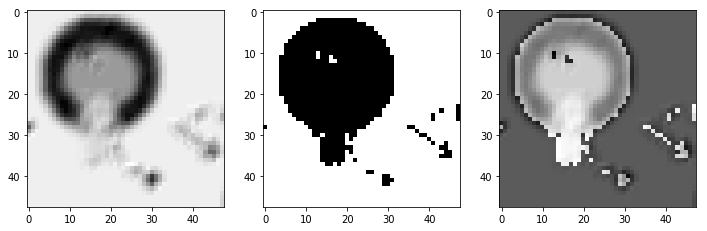

In [125]:
fig,axes = plt.subplots(ncols=3,figsize=(12,4))
axes[0].imshow(temp[:,:,0],cmap='gray')
axes[1].imshow(flags[2:-2,2:-2,0],cmap='gray')
axes[2].imshow(error[:,:,0],cmap='gray')
plt.show()

In [126]:
result = temp.copy()

In [127]:
result.mean()

0.7539451267698338

In [128]:
result[result>=0.7] = 1
result[result<0.7] = 0

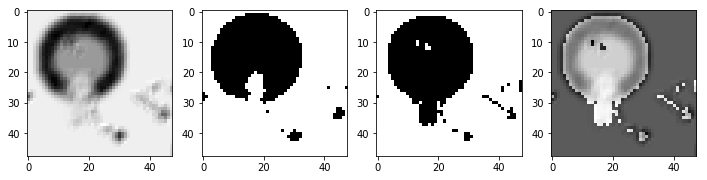

In [129]:
fig,axes = plt.subplots(ncols=4,figsize=(12,4))
axes[0].imshow(temp[:,:,0],cmap='gray')
axes[1].imshow(result[:,:,0],cmap='gray')
axes[2].imshow(flags[2:-2,2:-2,0],cmap='gray')
axes[3].imshow(error[:,:,0],cmap='gray')
plt.show()